In [71]:
import pandas as pd
import numpy as np
import scipy.stats as st
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Лабораторная работа №5
## Задание 3
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Данные

Для выборки значений случайной величины $X$ из генеральной совокупности:
1. Найти выборочные оценки математического ожидания, дисперсии и среднеквадратического отклонения случайной величины X , указать свойства этих оценок.
2. Составить группированный вариационный ряд.
3. Построить гистограмму и полигон относительных частот. На их основе выдвинуть нулевую гипотезу H0 о виде распределения (нормальное распределение).
4. На одном чертеже с гистограммой построить график теоретической плотности вероятностей. Сделать вывод об их визуальном совпадении.
5. Составить эмпирическую функцию распределения $F(x)$ и построить ее график.
6. На одном чертеже с эмпирической функцией распределения построить график теоретической функции распределения. Сделать вывод об их визуальном совпадении.
7. С помощью критерия согласия $\chi^2 $Пирсона проверить гипотезу H0 о виде распределения генеральной совокупности для уровня значимости $a = 0.1$. Сделать статистический вывод.
8. Построить доверительные интервалы для неизвестных математического ожидания и дисперсии нормально распределенной генеральной совокупности с параметрами $a = \overline{x_в}$ и $\sigma = S$ для уровней значимости $a = 0.1, a = 0.05, a = 0.01$. Сделать вывод о ширине доверительного интервала, в зависимости от уровня значимости $a$.

In [72]:
freq = pd.Series([71, 73, 19, 47, 78, 28, 35, 22, 48, 86, 27, 50, 27, 109, 20, 54, 58, 64, 56, 98, 55, 12, 52, 24, 24, 22, 67, 71, 23, 58, 19, 68, 31, 41, 95], name="f")
n = len(freq)
alpha_1 = 0.1
alpha_2 = 0.05
alpha_3 = 0.01
k = int(np.floor(np.log2(n) + 1))
min_x = min(freq) - k/2
h = round((max(freq) - min(freq))/k, 0)

In [73]:
Markdown(f'$n = {n}$; $\\alpha={alpha_1}, {alpha_2}, {alpha_3}$; min_x $= {min_x}$; $h = {h}$')

$n = 35$; $\alpha=0.1, 0.05, 0.01$; min_x $= 9.0$; $h = 16.0$

In [74]:
data = pd.DataFrame()
data["x_i"] = [min_x + h * i for i in range(k + 1)]
data["x_(i+1)"] = [min_x + h * (i + 1) for i in range(k + 1)]
data["f"] = freq.value_counts(bins=k + 1).sort_index().values
data

,x_i,x_(i+1),f
0,9.0,25.0,9
1,25.0,41.0,5
2,41.0,57.0,5
3,57.0,73.0,7
4,73.0,89.0,5
5,89.0,105.0,2
6,105.0,121.0,2


## Шаг 1: Вычисление характеристик выборки.

### Вычисление среднего значения

$$\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

In [75]:
mean = freq.sum() / n
mean

49.48571428571429

### Вычисление дисперсии

$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \overline{x})^2$$

In [76]:
variance = freq.var(ddof=1)
variance

660.198319327731

### Вычисление стандартного отклонения

$$s = \sqrt{s^2}$$

In [77]:
std = np.sqrt(variance)
std

25.69432465210423

Выборочное среднее:
1) Несмещенная оценка
2) Состоятельная
3) Линейная


Выборочная дисперсия:
1) Смещенная оценка. Для получения несмещенной оценки используют исправленную выборочную дисперсию.
2) Состоятельна
3) Неотрицательна

## Шаг 2: Составить группированный вариационный ряд

In [78]:
data["w"] = data["f"] / n
data

,x_i,x_(i+1),f,w
0,9.0,25.0,9,0.257143
1,25.0,41.0,5,0.142857
2,41.0,57.0,5,0.142857
3,57.0,73.0,7,0.200000
4,73.0,89.0,5,0.142857
5,89.0,105.0,2,0.057143
6,105.0,121.0,2,0.057143


## Шаг 3: Гистограмма относительных частот

/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical

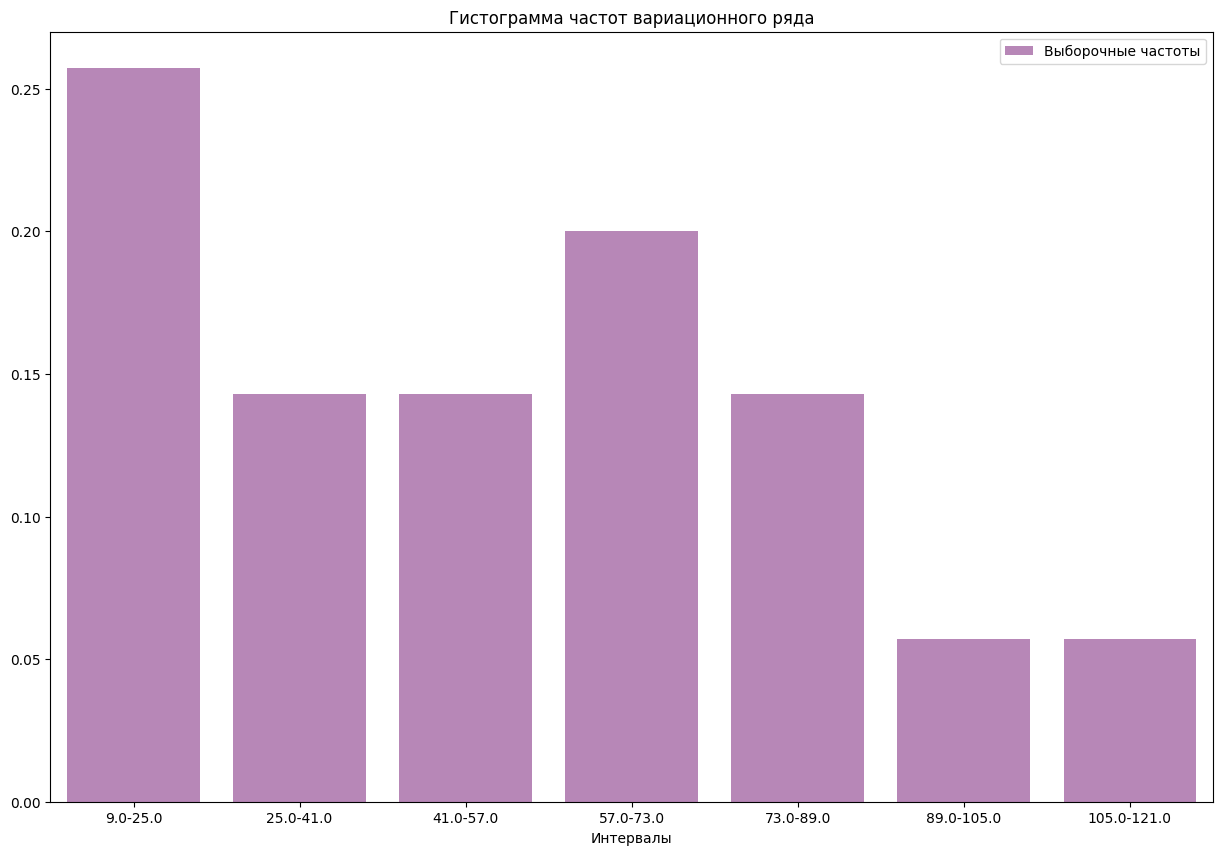

In [79]:
def plot_barplot(x, y1, y2=None, title=""):
    fig, ax = plt.subplots(figsize=(15, 10))
    ax = sns.barplot(x=x, y=y1, ax=ax, color="purple", alpha=0.5, label="Выборочные частоты")
    if y2 is not None:
        ax = sns.barplot(x=x, y=y2, ax=ax, color="red", alpha=0.5, label="Теоретичесие частоты")
    ax.set_title(title)
    ax.set_xlabel("Интервалы")
    ax.set_ylabel("")
    ax.legend()

plot_barplot(x=[f"{data.loc[i, 'x_i']}-{data.loc[i, 'x_i'] + h}" for i in data.index], y1=data["w"], title='Гистограмма частот вариационного ряда')

## Шаг 4: Проверка гипотезы о нормальности распределения

Для проверки гипотезы о нормальности распределения воспользуемся критерием согласия хи-квадрат. Нужно вычислить теоретические (ожидаемые) частоты попадания значений в каждый интервал, если бы распределение было нормальным. Для этого воспользуемся формулой:
$$P_i=P(x_i < X < x_{i+1})=Ф(\frac{x_{i+1} - \bar{x}}{S}) - Ф(\frac{x_{i} - \bar{x}}{S})$$
$$f' = fP_i$$

In [80]:
p = st.norm.cdf((data["x_(i+1)"] - mean) / std) - st.norm.cdf((data["x_i"] - mean) / std)

# assert np.isclose(p.sum(), 1, rtol=.01), "Сумма теоретических оснований должна быть равна 1."

data["f'"] = p * n
data["f'"]

0    3.946371
1    7.010446
2    8.554885
3    7.172074
4    4.130483
5    1.633693
6    0.443581
Name: f', dtype: float64

## Шаг 5: Гистограмма относительных частот c теоретическими

/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/cosmdandy/GitHub/Polytech-Statistics/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical

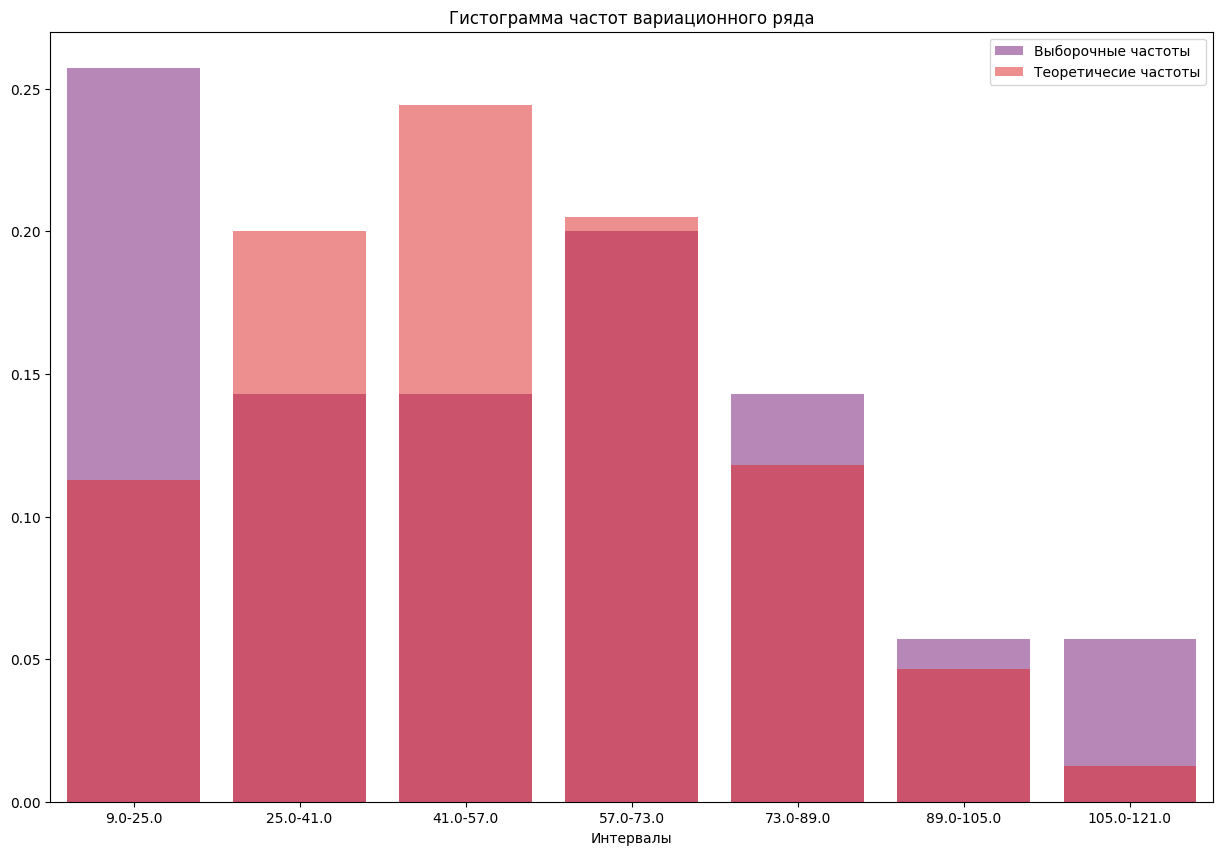

In [81]:
plot_barplot(x=[f"{data.loc[i, 'x_i']}-{data.loc[i, 'x_i'] + h}" for i in data.index], y1=data["w"], y2=p, title='Гистограмма частот вариационного ряда')

Исходя из гистограммы визуально распределения не совпадают.


## Шаг 6: Функция распределения

In [82]:
emp_func = data["w"].cumsum()
data["F*"] = emp_func
data[["x_i", "x_(i+1)", "F*"]]

,x_i,x_(i+1),F*
0,9.0,25.0,0.257143
1,25.0,41.0,0.400000
2,41.0,57.0,0.542857
3,57.0,73.0,0.742857
4,73.0,89.0,0.885714
5,89.0,105.0,0.942857
6,105.0,121.0,1.000000


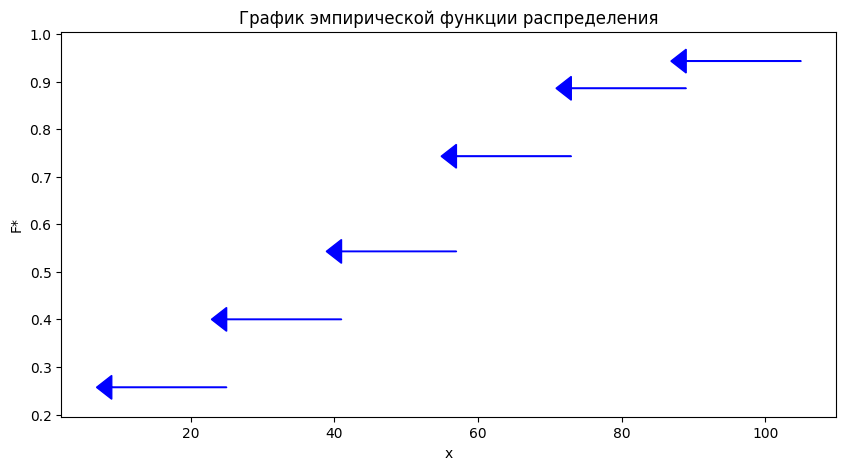

In [83]:
def plot_cdf_func(x, y, title, c=1):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max_y - min_y) / len(y)) * c * 20
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, color="blue", head_width=.05, head_length=arrow_length)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()


plot_cdf_func(data["x_i"], emp_func.values, 'График эмпирической функции распределения')

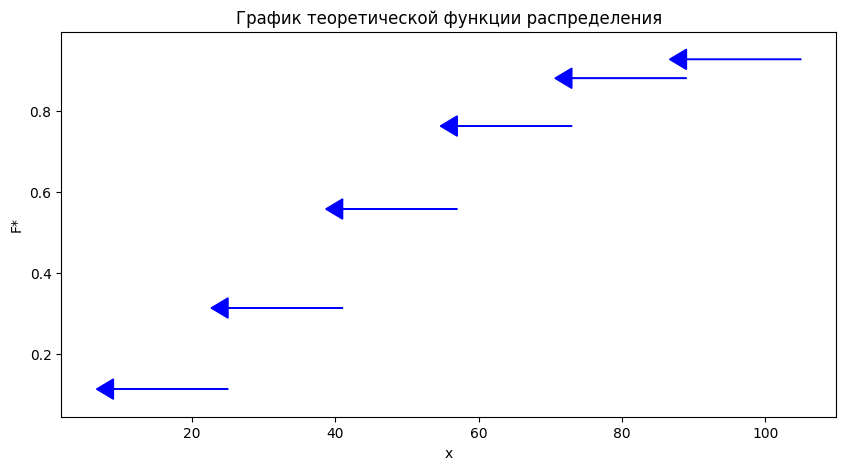

In [84]:
plot_cdf_func(data["x_i"], p.cumsum(), 'График теоретической функции распределения')

## Шаг 7: Вычисление значения статистики критерия

Вычислим значение статистики критерия $\chi^2$:


$$\chi^2 = \sum_{i=1}^{k} \frac{(f_i - f_i^*)^2}{f_i^*} = \frac{(\text{наблюдаемая частота} - \text{ожидаемая частота})^2}{\text{ожидаемая частота}}$$

In [85]:
data

,x_i,x_(i+1),f,w,f',F*
0,9.0,25.0,9,0.257143,3.946371,0.257143
1,25.0,41.0,5,0.142857,7.010446,0.400000
2,41.0,57.0,5,0.142857,8.554885,0.542857
3,57.0,73.0,7,0.200000,7.172074,0.742857
4,73.0,89.0,5,0.142857,4.130483,0.885714
5,89.0,105.0,2,0.057143,1.633693,0.942857
6,105.0,121.0,2,0.057143,0.443581,1.000000


In [86]:
chi2_value = ((data["f"] - data["f'"])**2 / data["f'"]).sum()
chi2_value

14.255702789201939

#### Степени свободы:

In [87]:
# два параметра у норм. распр. мат. ожидание и стандартное отклонение 
df = (data["f"] >= 5).sum() - 3
df

2

#### Критическое значение

In [88]:
alpha_1

0.1

In [89]:
chi2_critical = st.chi2.ppf(1-alpha_1, df=df)
chi2_critical

4.605170185988092

In [90]:
from IPython.display import Markdown, display

display(Markdown("## Вывод"))
display(Markdown(f"Таблица распределения хи-квадрат ($\chi^2$) со степенями свободы {df} и уровнем значимости {alpha_1} даёт критическое значение $\chi^2 = {chi2_critical}$."))
display(Markdown(f"Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = {chi2_value}$) превышает критическое значение ($\chi^2 = {chi2_critical}$), то мы отвергаем нулевую гипотезу $H_0$ и принимаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является нормальным."))

## Вывод

Таблица распределения хи-квадрат ($\chi^2$) со степенями свободы 2 и уровнем значимости 0.1 даёт критическое значение $\chi^2 = 4.605170185988092$.

Так как вычисленное значение статистики критерия Пирсона ($\chi^2 = 14.255702789201939$) превышает критическое значение ($\chi^2 = 4.605170185988092$), то мы отвергаем нулевую гипотезу $H_0$ и принимаем альтернативную гипотезу $H_1$. Это означает, что закон распределения генеральной совокупности не является нормальным.

## Шаг 8: Доверительные интервалы 

Доверительный интверал для мат. ожидания.

In [91]:
def calc_confidence_interval_mean(alpha, mean):
    x_gamma = st.norm.ppf(1 - alpha/2)
    delta = (x_gamma * std) / np.sqrt(n)
    return (mean - delta, mean + delta)

for a in [alpha_1, alpha_2, alpha_3]:
    display(Markdown(f"Таким образом с вероятностью {1 - a} можно утверждать, что можно утверждать, что мат. ожидание лежит в интервал {calc_confidence_interval_mean(alpha_1, mean)}"))

Таким образом с вероятностью 0.9 можно утверждать, что можно утверждать, что мат. ожидание лежит в интервал (42.34189529652223, 56.62953327490634)

Таким образом с вероятностью 0.95 можно утверждать, что можно утверждать, что мат. ожидание лежит в интервал (42.34189529652223, 56.62953327490634)

Таким образом с вероятностью 0.99 можно утверждать, что можно утверждать, что мат. ожидание лежит в интервал (42.34189529652223, 56.62953327490634)

Чем меньше уровень значимости тем шире доверительный интервал.


Доверительный интервал для стандартного отклонения.

In [92]:
def calc_confidence_interval_std(alpha, std):
    chi2_left = np.sqrt(st.chi2.ppf((2 - alpha)/2, n - 1))
    chi2_right = np.sqrt(st.chi2.ppf(alpha/2, n - 1))
    return (std * np.sqrt(n - 1))/chi2_left, (std * np.sqrt(n - 1))/chi2_right
    
for a in [alpha_1, alpha_2, alpha_3]:
    display(Markdown(f"Таким образом с вероятностью {1 - a} можно утверждать, что стандартное отклонение генеральной совокупности лежит в интервале {calc_confidence_interval_std(a, std)}"))

Таким образом с вероятностью 0.9 можно утверждать, что стандартное отклонение генеральной совокупности лежит в интервале (21.49057095433622, 32.18878088323685)

Таким образом с вероятностью 0.95 можно утверждать, что стандартное отклонение генеральной совокупности лежит в интервале (20.783421302089437, 33.6647586477339)

Таким образом с вероятностью 0.99 можно утверждать, что стандартное отклонение генеральной совокупности лежит в интервале (19.511177054199333, 36.88229591213995)